# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sinasc_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [24]:
limites = [0, 3, 5, 7, 10]
categorias = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

df['APGAR5_Categorizado'] = pd.cut(df['APGAR5'], bins=limites, labels=categorias, right=False)


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

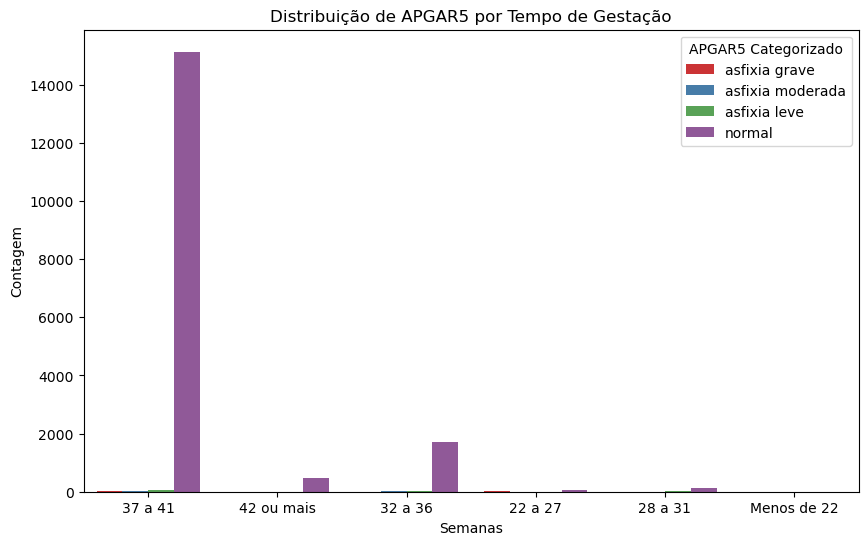

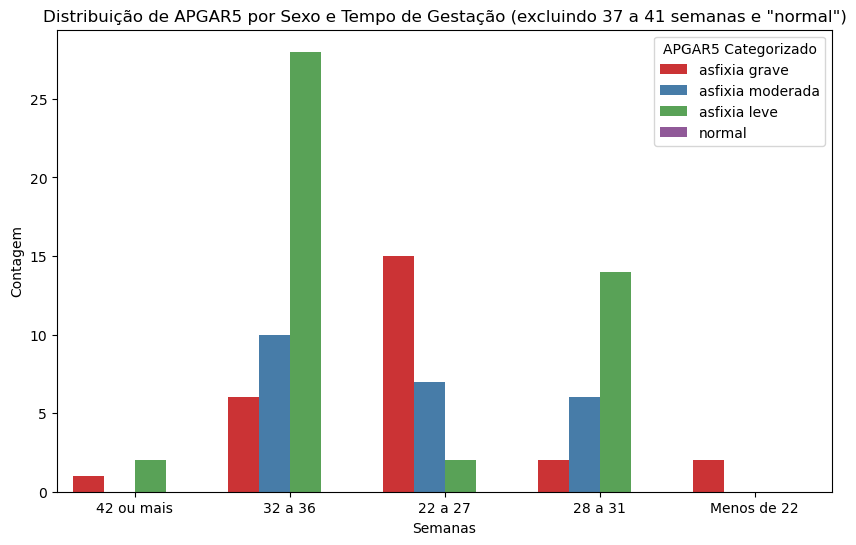

In [49]:
mapa_legendas = {
    '22 a 27 semanas': '22 a 27',
    '28 a 31 semanas': '28 a 31',
    '32 a 36 semanas': '32 a 36',
    '37 a 41 semanas': '37 a 41',
    '42 semanas e mais': '42 ou mais',
    'Menos de 22 semanas': 'Menos de 22'
}

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GESTACAO', hue='APGAR5_Categorizado', palette='Set1')
plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Semanas')
plt.ylabel('Contagem')
plt.legend(title='APGAR5 Categorizado')

labels = [mapa_legendas.get(label.get_text(), label.get_text()) for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(labels)

plt.show()



# GRÁFICO EXCLUINDO O APGAR5 NORMAL E O TEMPO DE GESTAÇÃO DE 37 A 41 SEMANAS 
# PARA UMA VISÃO MAIS LIMPAS DAS DEMAIS INFORMAÇÕES.

import seaborn as sns
import matplotlib.pyplot as plt

mapa_legendas = {
    '22 a 27 semanas': '22 a 27',
    '28 a 31 semanas': '28 a 31',
    '32 a 36 semanas': '32 a 36',
    '37 a 41 semanas': '37 a 41',
    '42 semanas e mais': '42 ou mais',
    'Menos de 22 semanas': 'Menos de 22'
}


df_filtered = df.query('GESTACAO != "37 a 41 semanas" and APGAR5_Categorizado != "normal"')


plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='GESTACAO', hue='APGAR5_Categorizado', palette='Set1')
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação (excluindo 37 a 41 semanas e "normal")')
plt.xlabel('Semanas')
plt.ylabel('Contagem')
plt.legend(title='APGAR5 Categorizado')

labels = [mapa_legendas.get(label.get_text(), label.get_text()) for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(labels)

plt.show()




####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [26]:
tabela_cruzada = pd.crosstab(index=df['GESTACAO'], columns=df['APGAR5_Categorizado'])

print(tabela_cruzada)

APGAR5_Categorizado  asfixia grave  asfixia moderada  asfixia leve  normal
GESTACAO                                                                  
22 a 27 semanas                 15                 7             2      53
28 a 31 semanas                  2                 6            14     127
32 a 36 semanas                  6                10            28    1725
37 a 41 semanas                 28                12            66   15133
42 semanas e mais                1                 0             2     472
Menos de 22 semanas              2                 0             0       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [27]:
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

print(percentuais_linha)


APGAR5_Categorizado  asfixia grave  asfixia moderada  asfixia leve     normal
GESTACAO                                                                     
22 a 27 semanas          19.480519          9.090909      2.597403  68.831169
28 a 31 semanas           1.342282          4.026846      9.395973  85.234899
32 a 36 semanas           0.339175          0.565291      1.582815  97.512719
37 a 41 semanas           0.183739          0.078745      0.433099  99.304416
42 semanas e mais         0.210526          0.000000      0.421053  99.368421
Menos de 22 semanas      33.333333          0.000000      0.000000  66.666667


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Figure size 1000x600 with 0 Axes>

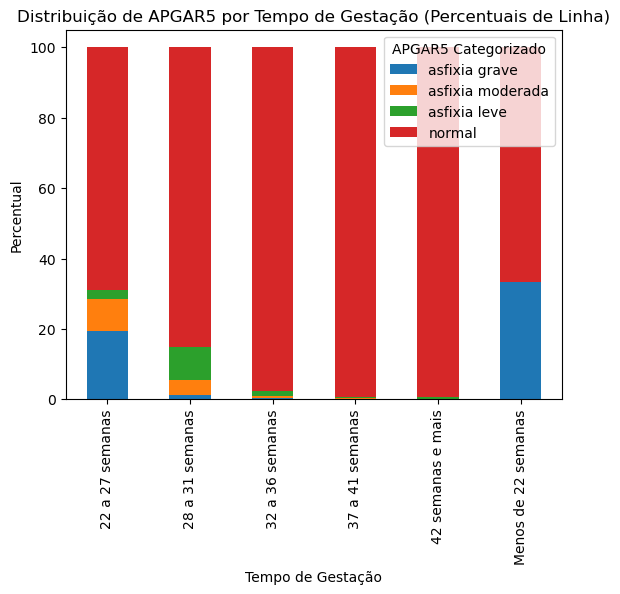

In [28]:
plt.figure(figsize=(10, 6))
percentuais_linha.plot(kind='bar', stacked=True)
plt.title('Distribuição de APGAR5 por Tempo de Gestação (Percentuais de Linha)')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual')
plt.legend(title='APGAR5 Categorizado')
plt.show()


O conjunto de dados corrobora com a afirmação dos médicos devido a seguinte conclusão.

* A medida que a idade gestacional aumenta, a incidência de asfixia grave diminui significativamente, na categoria de 22 a 27 semanas de gestação temos uma incidência de 19,48% de asfixia grave, sendo reduzida significativamente a medida que a idade gestacional aumenta. Quanto mais prematuro for o parto, ou seja, menor a idade gestacional, maior é a probabilidade de ocorrerem complicaões e problemas de saúde, como a asfixia grave, sendo que a medida que esta idade gestacional avança podemos ver claramente no gráfico que a incidência de problemas de saúde se amenizam até chegarem a um alto índice de partos normais. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

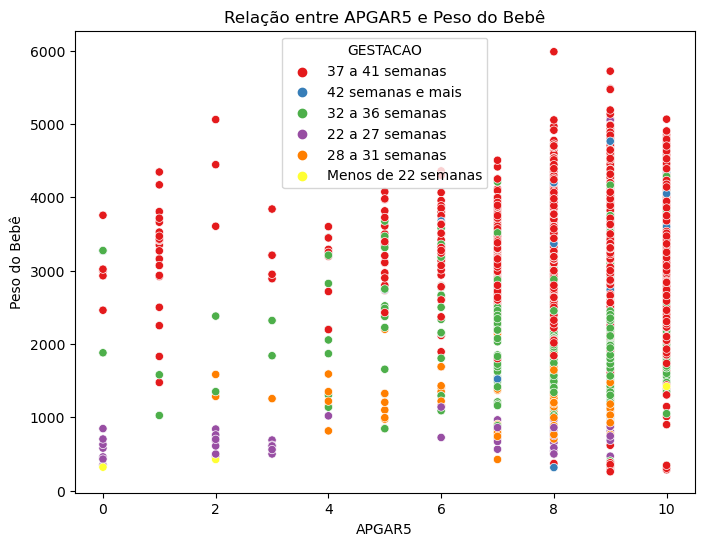

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='APGAR5', y='PESO', hue='GESTACAO', palette='Set1')
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê')
plt.show()


Existe uma relação sim entre o APGAR5 e o peso do bebê, porém essa relação é fraca e é fortemente influenciada por outros fatores, como por exemplo a idade gestacional. O APGAR5 é um indicador de saúde do recém-nascido imediatamente após o nascimento, mas o peso do bebê pode ser afetado por diversos fatores, como além da idade gestacional, a saúde de mãe, nutrição materna, fatores genéticos, tabagismo e consumo de álcool e até mesmo a multiparidade, sendo assim há relação entre o APGAR5 e o peso do bebê, porém ela não é exclusiva.